# Optimización - Laboratorio 9

### Isabella Salgado 201730418
### Juan Pablo Naranjo 201730006

## Librerías para el laboratorio

In [1]:
import numpy as np
from numpy import inf
from numpy import linalg as LA
import sympy as sym
from scipy.optimize import linprog
from scipy.optimize import minimize
from sympy import *
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import numdifftools as nd

## Punto 1

Se hará la prueba de convexidad para la función definida abajo.

In [2]:
# Se define la función
def gamma(x,y):
    return (3*(1-x)**2)*np.exp(-x**2-(y+1)**2) - 10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2) - (1/3)*np.exp(-(x+1)**2-y**2)

Se grafica la función en $R^3$ para tener más claridad sobre su forma.

Text(0.5, 0, 'Z')

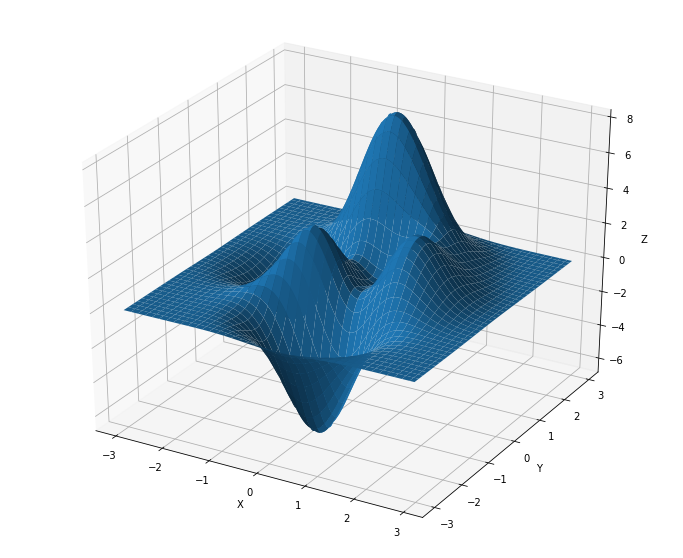

In [64]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(x, y)
# Función para graficar en R3.
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Para hacer la prueba de convexidad, se parte de la siguiente definición de convexidad:

$$f(\alpha x + (1-\alpha)y) \leq \alpha f(x) + (1-\alpha)f(y)$$

In [4]:
def convextest(x1,x2,titulo):
    # Se define un vector alpha que va entre 0 y 1, separado equitativamente en 50 componentes.
    alpha = np.linspace(0,1,50)
    
    # Dos listas para guardar los puntos de la función y del segmento de recta.
    funcion = []
    recta = []
    
    # Para cada apha, se evalúa la función en los dos puntos que entran por parámetro. 
    # Igualmente, se construye el segmento de recta usando la parte derecha de la desigualdad mostrada previamente. 
    for a in alpha:
        funcion.append(gamma(a*x1[0] + (1-a)*x2[0], a*x1[1] + (1-a)*x2[1]))
        recta.append(a*gamma(x1[0],x1[1]) + (1-a)*gamma(x2[0],x2[1]))
        
    # Parámetros de la gráfica
    plt.plot(alpha, funcion, label = "Función")
    plt.plot(alpha, recta, label = "Segmento de recta")
    plt.xlabel("$t$", fontsize=12)
    plt.ylabel("$\gamma$", fontsize=12)
    plt.title(titulo)
    plt.legend(title="Curvas")
    plt.grid()
    plt.show()

### a)

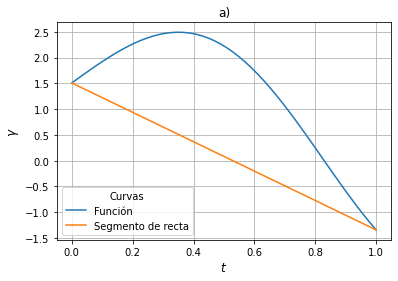

In [5]:
x1 = np.array([[1/10],[-1]])
x2 = np.array([[-11/10],[-1]])
convextest(x1, x2, "a)")

Localmente, esta función sería cóncava porque -$\gamma$ es convexa.

### b)

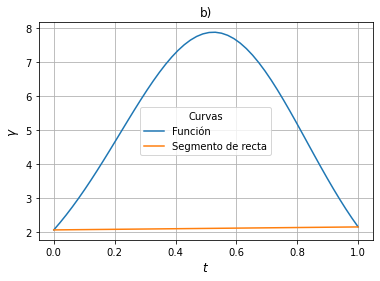

In [6]:
x1 = np.array([[-11/10],[17/10]])
x2 = np.array([[12/10],[17/10]])
convextest(x1, x2, "b)")

Localmente, esta función sería cóncava porque -$\gamma$ es convexa.

### c)

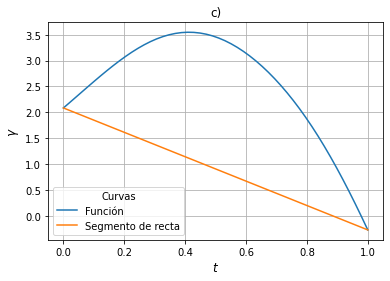

In [7]:
x1 = np.array([[1],[-1]])
x2 = np.array([[16/10],[3/5]])
convextest(x1, x2, "c)")

Localmente, esta función sería cóncava porque -$\gamma$ es convexa.

### d)

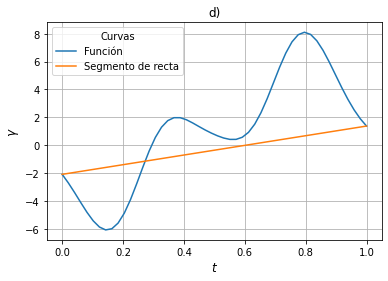

In [8]:
x1 = np.array([[0],[13/5]])
x2 = np.array([[0],[-12/5]])
convextest(x1, x2, "d)")

Localmente esta función no es ni cóncava ni convexa porque el segmento de recta no está todo el tiempo encima de la función $\gamma$ o -$\gamma$. 

## Punto 2

Gráficas de contorno de la función $\gamma$

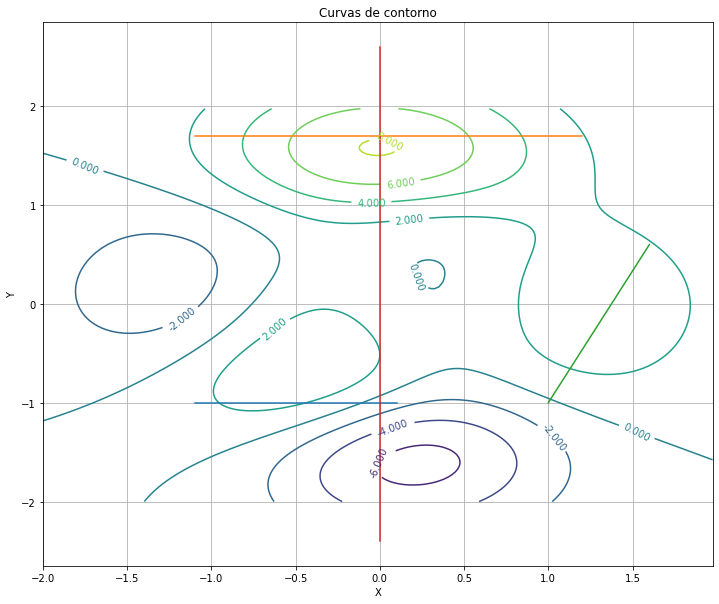

In [79]:
# Se define cada coorendada de puntos sobre los cuales se traza el segmento de recta.
a = np.array([[1/10, -11/10], [-1, -1]])
b = np.array([[-11/10, 12/10], [17/10, 17/10]])
c = np.array([[1, 16/10], [-1, 3/5]])
d = np.array([[0, 0], [13/5, -12/5]])

step = 0.025
x = np.arange(-2, 2, step)
y = np.arange(-2, 2, step)

X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# En estas líneas se definen los dos puntos extremos sobre los cuales debe quedar dibujado el segmento de recta sobre el
# cual se realizó la prueba de convexidad.
plt.plot(a[0], a[1])
plt.plot(b[0], b[1])
plt.plot(c[0], c[1])
plt.plot(d[0], d[1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Curvas de contorno')
ax.grid() 

## Punto 3

Se grafica el gradiente de la función sobre las curvas de contorno.

Text(0.5, 1.0, 'Punto 3')

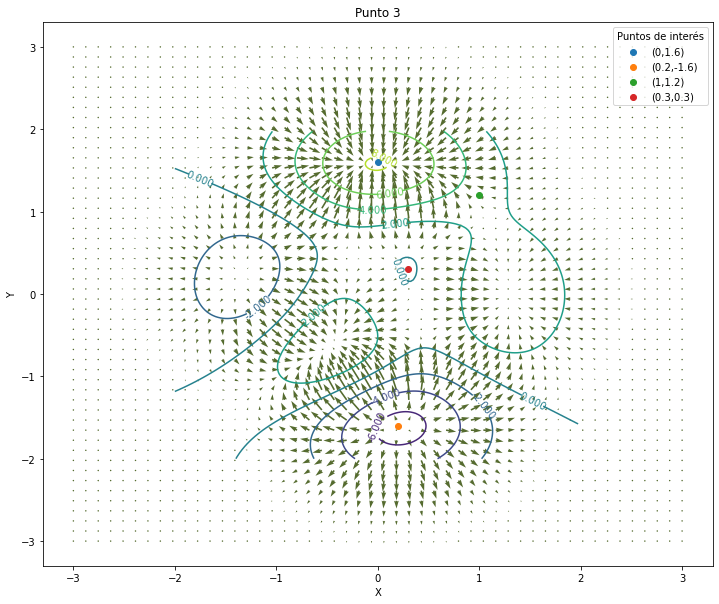

In [80]:
# Se construirá una cuadrícula de ngrad * ngrad cuadros. 
ngrad=50
scale=2

# Una lista con los puntos de interés a graficar.
puntos = [[0, 1.6], [0.2, -1.6], [1, 1.2], [0.3, 0.3]]

# Se define el espacio sobre el cual estará definido el gradiente.
x1 = np.linspace(-3, 3, num=ngrad)
y1 = np.linspace(-3, 3, num=ngrad)

# Se evalúa la función
X1, Y1 = np.meshgrid(x1,y1)
Z1 = gamma(X1,Y1)

# Para graficar las curvas de contorno en la misma gráfica que el gradiente
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se define el gradiente de la función
dy, dx = np.gradient(Z1)

# Se dibujan los vectores que representan el comportamiento del gradiente en la cuadrícula definida previamente
plt.quiver(X1,Y1,dx,dy, 
           scale = 100/scale, 
           color = 'darkolivegreen')

# Se imprime cada punto de interés en la misma gráfica
for p in puntos:
    aux = p
    ax.scatter(p[0], p[1], label = '(' + str(p[0]) + ',' + str(p[1]) + ')')

ax.legend(title='Puntos de interés')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Punto 3")

### a)
El gradiente alrededor del punto (0, 1.6) tiende a 0. Esto quiere decir que este es un punto crítico de la función y puede ser un mínimo o un máximo local. Por la dirección en que apunta el gradiente a medida que se acerca a este punto, se puede decir que este es un punto máximo, pues el gradiente siempre apunta en la dirección de máximo incremento de la función. 

### b)
El gradiente alrededor del punto (0.2, -1.6) también tiende a cero. Por lo tanto, también es un punto grítico de la función. En este caso, este punto representa un mínimo local pues la dirección del gradiente alrededor de este punto apunta hacia afuera del punto; es decir que la función crece a medida que se se aleja del punto.

### c)
El gradiente alrededor del punto (1, 1.2) no indica algo muy significativo sobre el comportamiento de la función. En este punto, el gradiente apunta hacia el punto crítico más cercano, que corresponde al punto (0, 1.6)

### d)
El gradiente alrededor del punto (0.3, 0.3) también tiende a cero. Se puede notar que el gradiente apunta hacia afuera de este punto. Es decir que la función incrementa a medida que se aleja de este punto. Por esta razón, este punto se puede clasificar como un mínimo local.

## Punto 4

Se define la función nuevamente de una manera alternativa, para poder usar la función *minimize* luego. De igual forma, se define el negativo de la función para poder diferenciar entre máximos y mínimos de la función usando *minimize*.

In [81]:
def f(x):
    return (3*(1-x[0])**2)*np.exp(-x[0]**2-(x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5)*np.exp(-x[0]**2-x[1]**2) - (1/3)*np.exp(-(x[0]+1)**2-x[1]**2)

def f1(x):
    return -f(x)

In [83]:
# Mirando la gráfica del punto 3 y dependiendo del comportamiento del gradiente en estos puntos, se determinan algunos 
# puntos que son una aproximación de el punto crítico exacto de la función. Estos puntos se guardan en una lista y van a 
# servir como el punto inicial para que la función minimize busque el punto crítico usando ese punto como aproximación
# inicial.
posibles_criticos = [[0, 1.6], [0.2, -1.6], [0.3, 0.3], [-0.5,-0.5], [-1.4,0.2], [1.3,0]]

for p in posibles_criticos:
    print(f'\nAproximación: {p}')
    # Se sabe que estos puntos críticos corresponden a máximos locales, por lo tanto se usa la función minimize con el
    # negativo de la función.
    if p==[0,1.6] or p==[1.3,0] or p==[-0.5,-0.5]:
        res = minimize(f1, p, method='bfgs')
        print(f'Punto crítico: {np.round(res.x,3)}')
    # Como el resto de los puntos corresponden a mínimos, se usa la función tal como se definió desde el inicio.
    else:
        res = minimize(f, p, method='bfgs')
        print(f'Punto crítico real: {np.round(res.x,3)}')


Aproximación: [0, 1.6]
Punto crítico: [-0.009  1.581]

Aproximación: [0.2, -1.6]
Punto crítico real: [ 0.228 -1.626]

Aproximación: [0.3, 0.3]
Punto crítico real: [0.296 0.32 ]

Aproximación: [-0.5, -0.5]
Punto crítico: [-0.46  -0.629]

Aproximación: [-1.4, 0.2]
Punto crítico real: [-1.347  0.205]

Aproximación: [1.3, 0]
Punto crítico: [ 1.286 -0.005]


### a) 
Existen 7 puntos críticos en la función:

| # |   Punto Crítico  | Clasificación |
|---|:----------------:|:-------------:|
| 1 |  [-0.009, 1.581] |     Máximo    |
| 2 |  [0.228, -1.626] |     Mínimo    |
| 3 |  [0.296, 0.320]  |     Mínimo    |
| 4 | [-0.460, -0.629] |     Máximo    |
| 5 |  [-1.347, 0.205] |     Mínimo    |
| 6 |  [1.286, -0.005] |     Máximo    |
| 7 |  Todo punto que no está en $[-3,3]^2$ |     Punto de silla    |


### b) 
Entre estos puntos se encuentra el máximo y el mínimo global de la función. Estos puntos corresponden a $x = [-0.009, 1.581]$ y a $x = [0.228, -1.626]$, respecticamente. 

Esta afirmación se puede hacer porque los puntos mostrados en la tabla son los únicos mínimos y máximos de la función para todo punto en $R^2$. Se sabe que el máximo global de la función es $x = [-0.009, 1.581]$, pues viendo la gráfica de $f$ en el punto 1 se ve que en este par de coordenadas se encuentra el valor mínimo de la función.

Similarmente, se sabe que el mínimo global de la función es $x = [0.228, -1.626]$, pues viendo la gráfica de $f$ en el punto 1 se ve que en este par de coordenadas se encuentra el valor máximo de la función.